In [1]:
#let's import the needed libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# let's Read data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


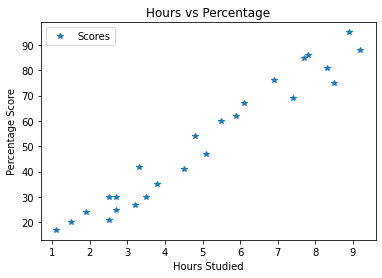

In [4]:
# Let's Plot the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

As we can see in graph the relation between hours studied and percentage score is linear.

# Let's Prepare the data:
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Let's break the data into Training Data and Testing Data using Scikit Learn's train_test_split() method.

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

The Data is divided now let's train the model.

# Let's train the data:

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

print("Training Complete.")

Training Complete.


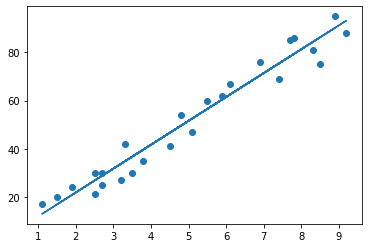

In [12]:
#Let's plot the regression line
line= regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

# Lets Predict:
Now the data is trained so Let's Predict:

In [13]:
print(X_test) #Testing Data-In hours
y_pred = regressor.predict(X_test) #Predicting the score


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
#let's compare the actual & predicted data.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Let's evaluate the Model:

This is the final step where we check the performance and accuracy of the model.

In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


In [19]:
result = regressor.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 94.549%
